# House prediction using linear regression

## Importing datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Loading Dataset

In [ ]:
df = pd.read_csv('Housing - Housing.csv')

## EDA


In [ ]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Missing value checking


In [ ]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


## outlier analysis


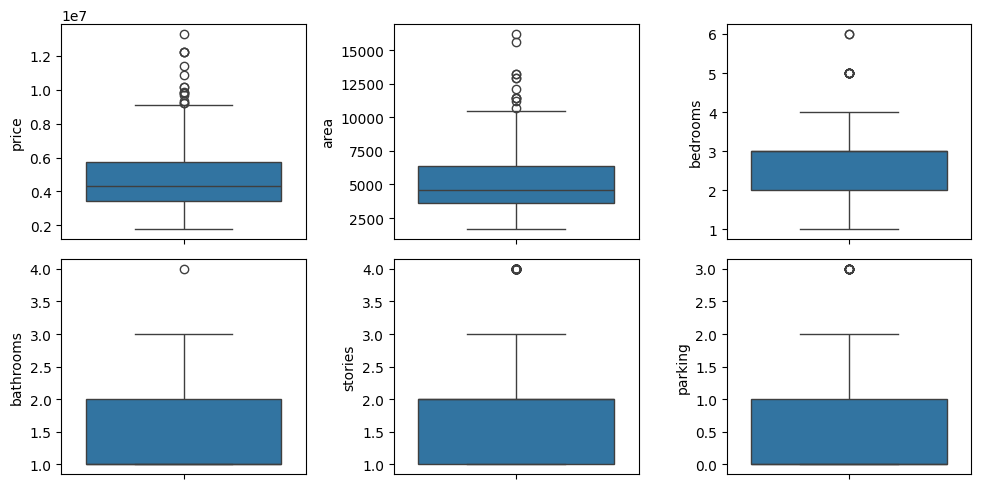

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(10,5))
plt1 = sns.boxplot(df['price'], ax=axs[0,0])
plt2 = sns.boxplot(df['area'], ax=axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax=axs[0,2])
plt4 = sns.boxplot(df['bathrooms'], ax=axs[1,0])
plt5 = sns.boxplot(df['stories'], ax=axs[1,1])
plt6 = sns.boxplot(df['parking'], ax=axs[1,2])
plt.tight_layout()
plt.show()

## pair plot

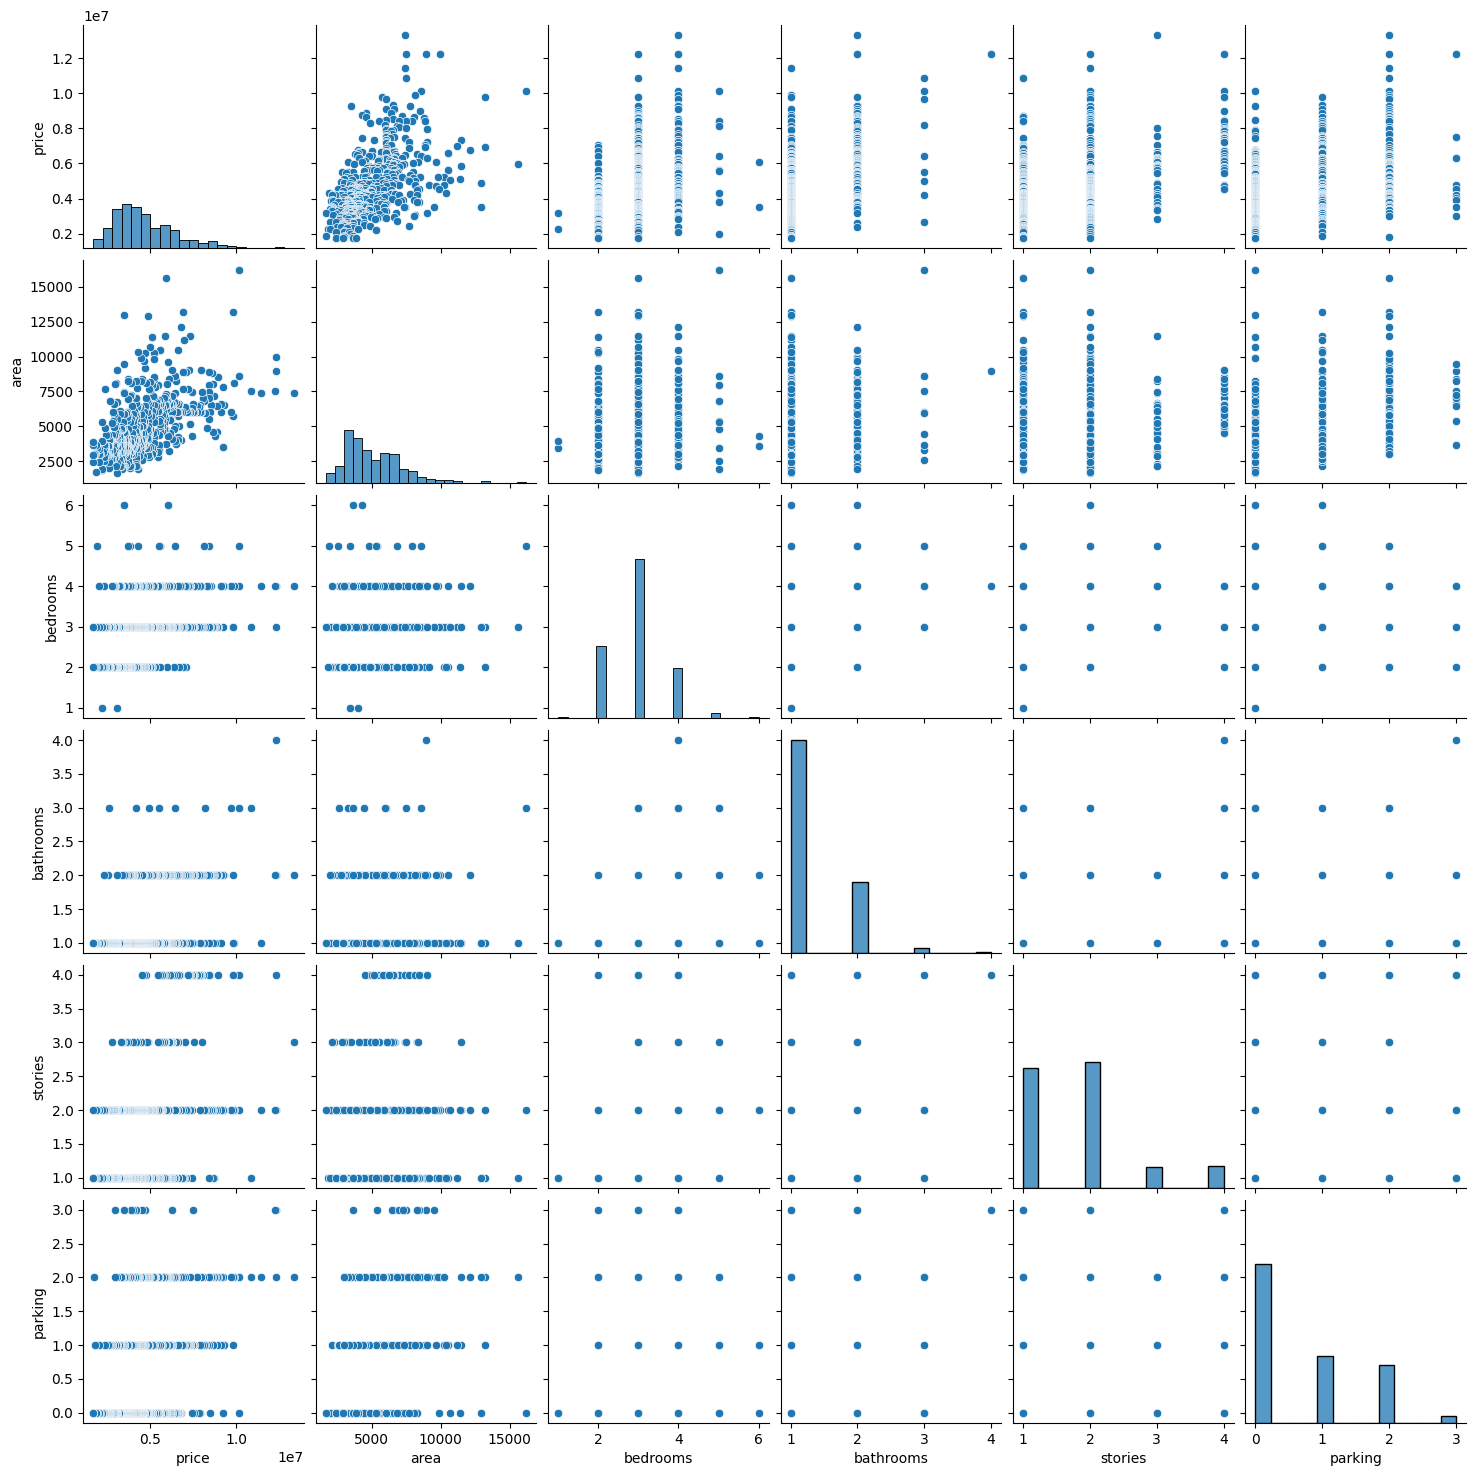

In [ ]:
sns.pairplot(df)
plt.show()

## Data Preprocessing

In [ ]:
# Encoding the Categrocial variable
features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df_encoded = pd.get_dummies(df[features], drop_first=True)
df_encoded['price'] = df['price']

In [ ]:
df_encoded

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,price
0,True,False,False,False,True,True,13300000
1,True,False,False,False,True,False,12250000
2,True,False,True,False,False,True,12250000
3,True,False,True,False,True,True,12215000
4,True,True,True,False,True,False,11410000
...,...,...,...,...,...,...,...
540,True,False,True,False,False,False,1820000
541,False,False,False,False,False,False,1767150
542,True,False,False,False,False,False,1750000
543,False,False,False,False,False,False,1750000


## Splitting the Data

In [ ]:
x = df_encoded.drop('price', axis=1)
y = df_encoded['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Building the Regression Model

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Making Prediction

In [ ]:
y_pred = model.predict(x_test)

## Evaluating the model

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3254189950926.765
R-squared: 0.35618859916519907


## Visulization of Actual vs predicted prices

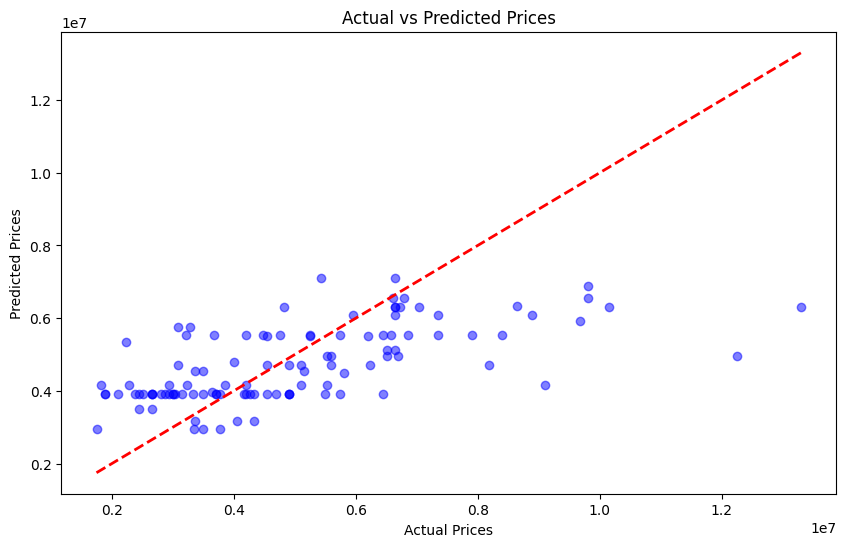

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred,color = 'blue',alpha =0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],'r--',lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

## Residual Plot

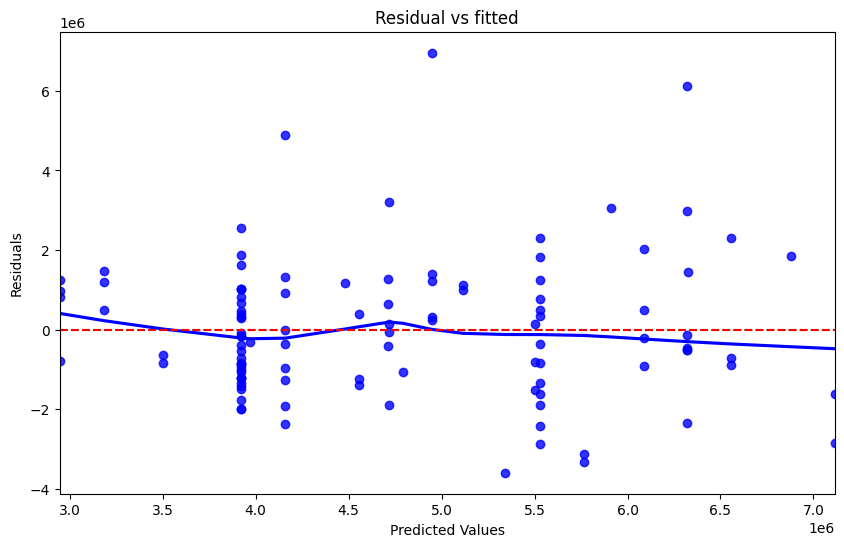

In [ ]:
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test-y_pred, color='blue',lowess=True,)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual vs fitted')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()